In [ ]:
import sys

sys.path.append("..")
from core.DataLoader import DataPreprocessor, get_load_config_from_yaml
import numpy as np
from importlib import reload
import matplotlib.pyplot as plt
import yaml
import core.keras_models as Models
import core
import os

# Configuration
if False:
    PLOTS_DIR = "plots/ToponiumInfusedTransformer/"
    MODEL_DIR = "models/mixed_model"
elif True:
    PLOTS_DIR = "plots/RegressionTransformer_pil/"
else:
    PLOTS_DIR = "plots/RegressionTransformer_/"
    MODEL_DIR = "../models/regression_transformer_old/"


CONFIG_PATH = "../config/workspace_config.yaml"

# Create directories
os.makedirs(PLOTS_DIR, exist_ok=True)

# Set plotting style
plt.rcParams.update({"font.size": 18})

# Load data
load_config = get_load_config_from_yaml(CONFIG_PATH)
DataProcessor = DataPreprocessor(load_config)

data_config = DataProcessor.load_from_npz(
    load_config.data_path["nominal"], event_numbers="odd", max_events=2_000_000
)
X, y = DataProcessor.get_data()
del DataProcessor

## Load Model and Setup Evaluator

In [ ]:
import core.reconstruction.BaselineMethods as BaselineMethods
import core.evaluation.reconstruction_evaluator as Evaluation
from core.reconstruction import (
    GroundTruthReconstructor,
    PerfectAssignmentReconstructor,
    CompositeNeutrinoComponentReconstructor,
)

reload(Evaluation)
reload(BaselineMethods)
ground_truth_assigner = GroundTruthReconstructor(data_config, use_nu_flows=True)
transformer = PerfectAssignmentReconstructor(
    data_config, neutrino_reco_name=r"Transformer $\nu$"
)
MODEL_DIR = "../models/regression_transformer/"
transformer.load_model(f"{MODEL_DIR}/odd_model.keras")
transformer_cartesian = PerfectAssignmentReconstructor(
    data_config, neutrino_reco_name=r"Transformer (Cartesian) $\nu$"
)
MODEL_DIR = "../models/regression_transformer_cartesian/"
transformer_cartesian.load_model(f"{MODEL_DIR}/odd_model.keras")



prediction_manager = Evaluation.PredictionManager(
    [ground_truth_assigner,transformer,transformer_cartesian], X, y#, load_directory=PREDICTIONS_DIR
)

evaluator = Evaluation.ReconstructionEvaluator(prediction_manager)

In [ ]:
PLOTS_DIR = "plots/RegressionTransformer_cartesian/"


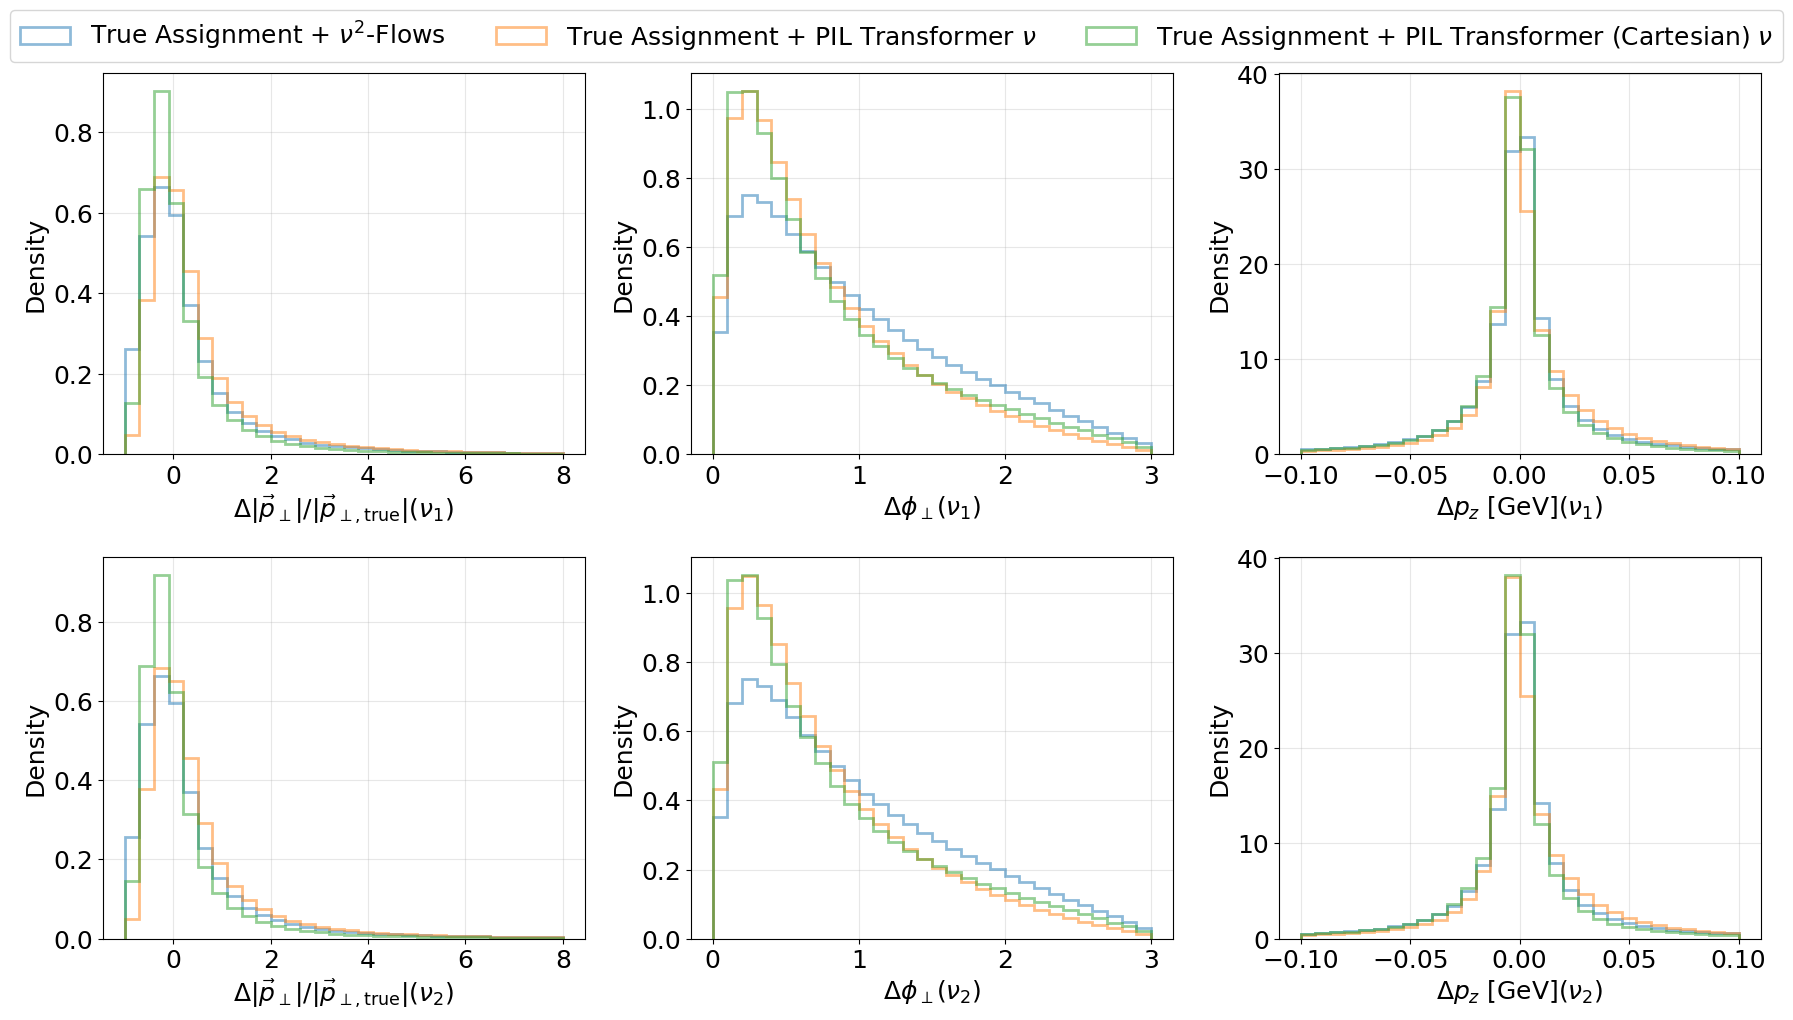

In [8]:
fig, ax = evaluator.plot_relative_neutrino_deviations(
    bins=30, coords="spherical_lepton_fixed", xlims=[(-1,8),(0,3),(-100/1e3,100/1e3)]
)
fig.savefig(
    f"{PLOTS_DIR}/neutrino_reconstruction_comparison_spherical.pdf", bbox_inches="tight"
)

Using cached reconstructed variable 'parallel_component_nu' for reconstructor True Assignment + $\nu^2$-Flows.
Using cached reconstructed variable 'parallel_component_nu' for reconstructor True Assignment + PIL Transformer $\nu$.
Using cached reconstructed variable 'parallel_component_nu' for reconstructor True Assignment + PIL Transformer (Cartesian) $\nu$.


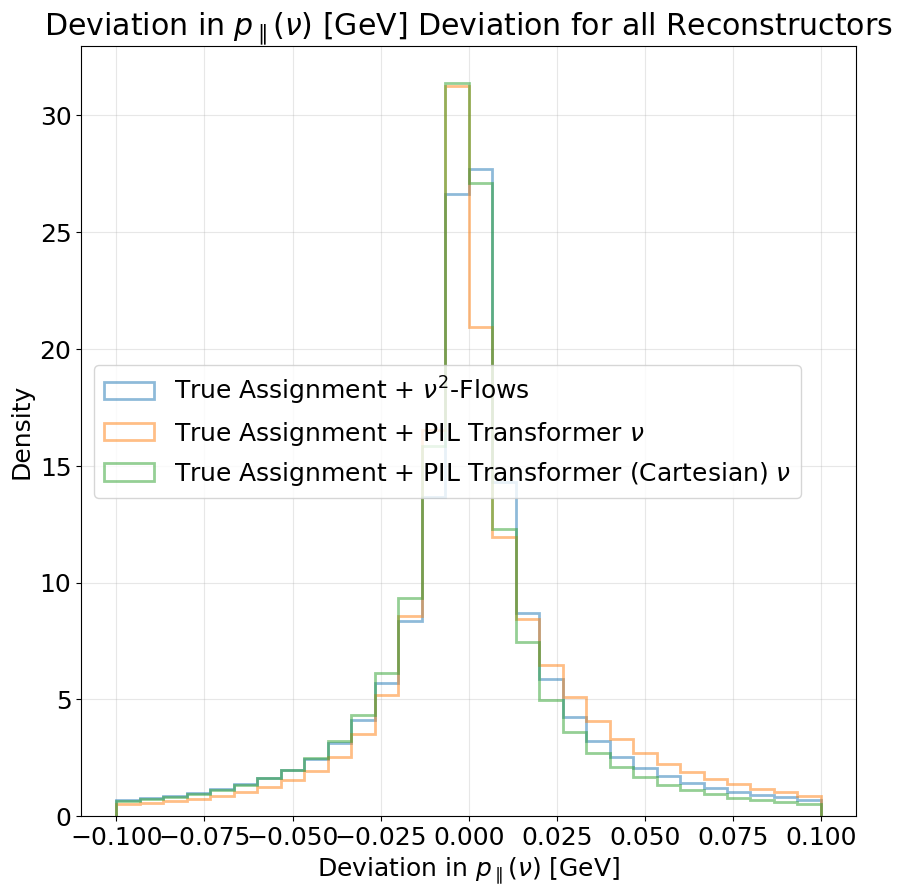

In [9]:
fig, ax = evaluator.plot_variable_deviation("parallel_component_nu", bins=30,xlims=(-100/1e3,100/1e3))
ax.legend(loc="center left")
fig.savefig(os.path.join(PLOTS_DIR, "nu_parallel_component_deviation.pdf"))

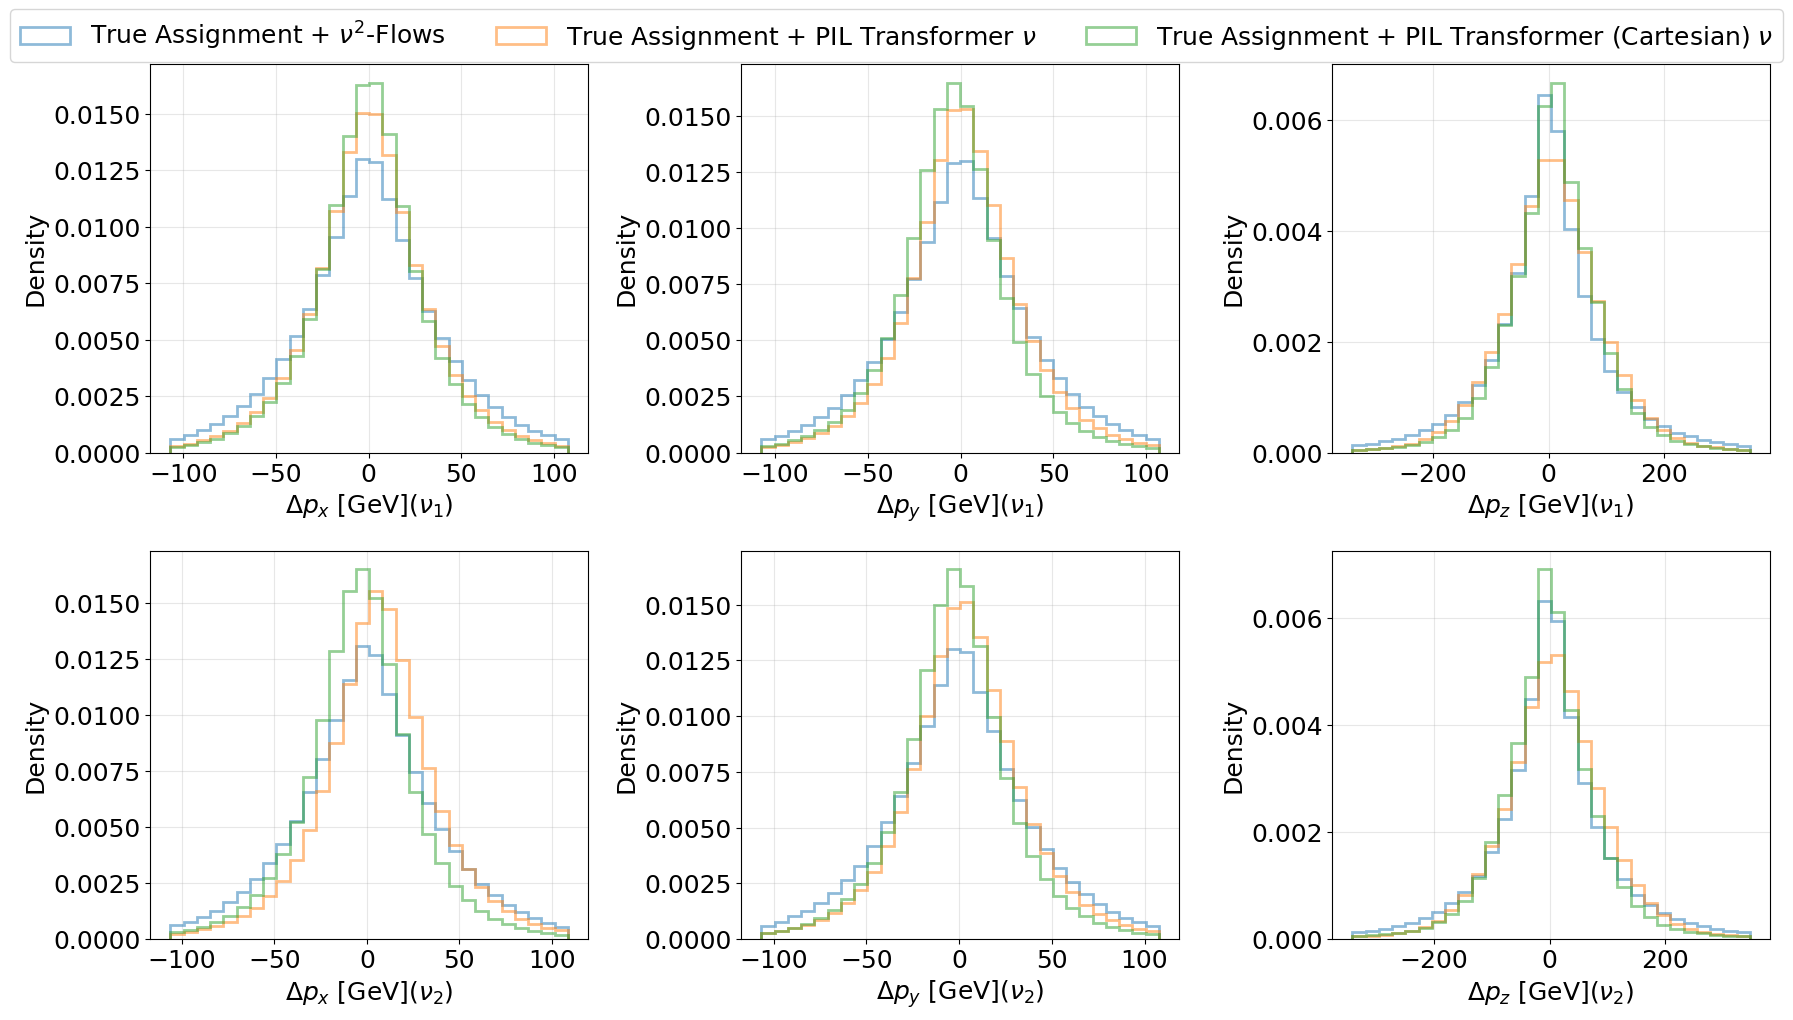

In [10]:
fig, ax = evaluator.plot_relative_neutrino_deviations(bins=30, coords="cartesian")
fig.savefig(f"{PLOTS_DIR}/neutrino_reconstruction_comparison.pdf", bbox_inches="tight")

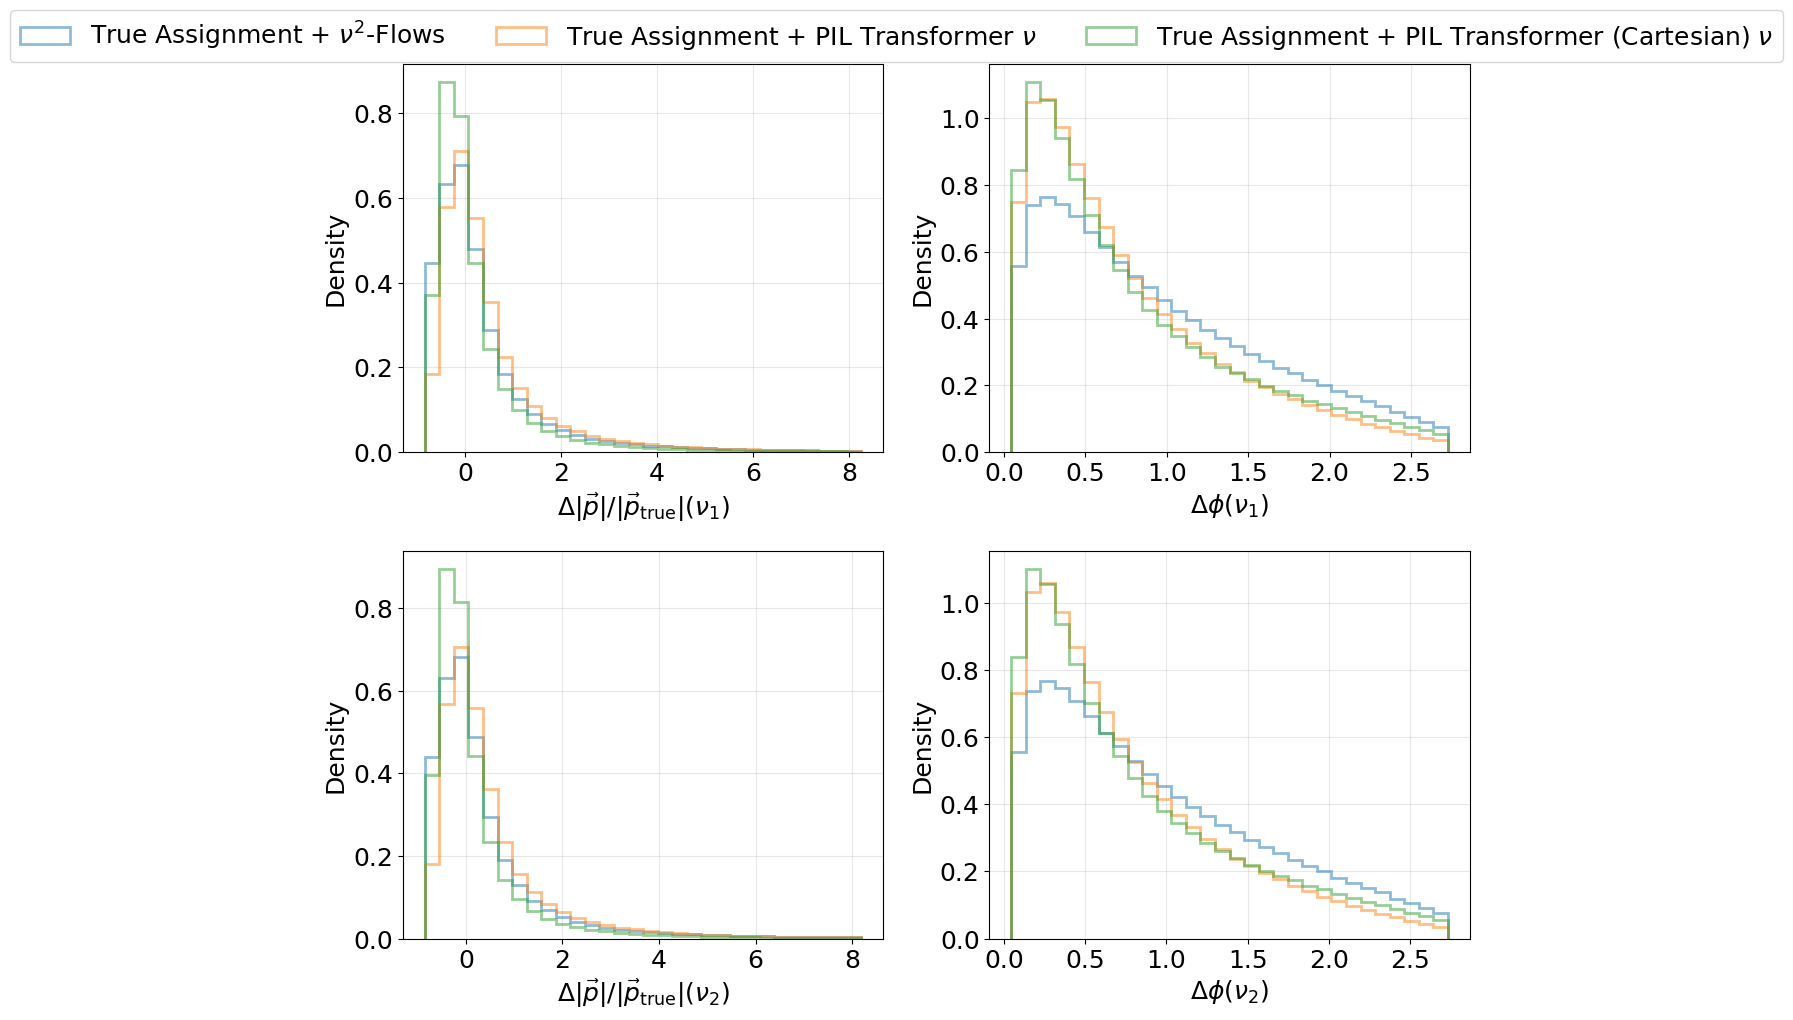

In [11]:
fig, ax = evaluator.plot_relative_neutrino_deviations(bins=30, coords="spherical")
fig.savefig(f"{PLOTS_DIR}/neutrino_reconstruction_comparison_spherical.pdf", bbox_inches="tight")